In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import sklearn.preprocessing
import numpy as np
import collections
import copy
from sklearn import metrics
from random import randint

Similarité entre les personnages

In [3]:
f = open('./feature','r')
#f_2 = open('./feature_chapiter','r')
X = []
#X_2 = []
for line in f:
    temp = map(float, line.replace('[','').replace(']','').split(',')[:])
    X.append(temp)
#for line in f_2:
#    temp = map(float, line.replace('[','').replace(']','').split(',')[:])
#    X_2.append(temp)

f.close()

X = np.array(X)
#X_2 = np.array(X_2)
    
nX = sklearn.preprocessing.normalize(X, norm='l2', axis=1, copy=True)
#nX_2 = sklearn.preprocessing.normalize(X_2, norm='l2', axis=1, copy=True)

#X = []
#for i in range(len(nX)):
#    X.append([])
#    for t in nX[i]:
#        X[i] = np.append(X[i], [t])
#    for c in nX_2[i]:
#        X[i] = np.append(X[i], [c])
#X = np.array(X)
X = np.array(nX)

/usr/local/lib/python2.7/dist-packages/IPython/kernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
/usr/local/lib/python2.7/dist-packages/IPython/kernel/__main__.py:1: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':


<matplotlib.colorbar.Colorbar instance at 0x7f34b4febea8>

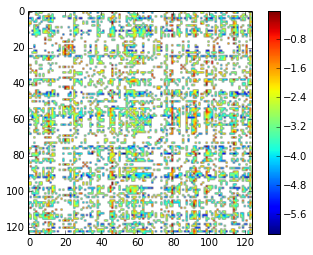

In [4]:
imshow(np.log(X))
colorbar()

In [5]:
X[13,:]

array([ 0.        ,  0.        ,  0.00967913,  0.01935826,  0.05807479,
        0.04839566,  0.01935826,  0.        ,  0.        ,  0.        ,
        0.        ,  0.03871653,  0.01935826, -0.00967913,  0.05807479,
        0.        ,  0.        ,  0.        ,  0.        ,  0.00967913,
        0.        ,  0.        ,  0.        ,  0.00967913,  0.        ,
        0.05807479,  0.00967913,  0.        ,  0.        ,  0.00967913,
        0.        ,  0.        ,  0.        ,  0.00967913,  0.        ,
        0.        ,  0.        ,  0.        ,  0.10647045,  0.03871653,
        0.        ,  0.        ,  0.        ,  0.        ,  0.05807479,
        0.23229916,  0.08711219,  0.03871653,  0.        ,  0.        ,
        0.00967913,  0.        ,  0.        ,  0.        ,  0.07743305,
        0.0290374 ,  0.04839566,  0.05807479,  0.06775392,  0.09679132,
        0.        ,  0.01935826,  0.03871653,  0.09679132,  0.        ,
        0.01935826,  0.0290374 ,  0.00967913,  0.00967913,  0.  

In [6]:
X[14,:]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.06178021,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.06178021,  0.0308901 ,  0.18534062, -0.0308901 ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.15445052,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.0308901 ,  0.09267031,
        0.        ,  0.        ,  0.        ,  0.        ,  0.0308901 ,
        0.21623072,  0.0308901 ,  0.06178021,  0.        ,  0.        ,
        0.09267031,  0.06178021,  0.        ,  0.        ,  0.0308901 ,
        0.        ,  0.0308901 ,  0.0308901 ,  0.09267031,  0.12356041,
        0.        ,  0.0308901 ,  0.06178021,  0.0308901 ,  0.        ,
        0.0308901 ,  0.        ,  0.0308901 ,  0.        ,  0.  

In [7]:
np.dot(X[0,:],X[1,:])

0.83848188287698655

In [8]:
A = np.dot(X, X.T)
A_array = np.array(A).flatten()

A_order = (np.argsort(A_array))[::-1]
A_sorted = (np.sort(A_array))[::-1]
print A_order

[12875  8250  2875 ...,  2144  8832  2705]


In [9]:
name = open('./result','r')
ps = []
for line in name:
    person = line.split('      ')[0]
    ps.append(person)
    
name.close()

Le résultat des similarités est le fichier "similarities" dans le répératoire sur GitHub

In [10]:
f_res = open('./similarities','w')

n = len(X)
for i in range(len(A_order)):
    x = A_order[i]/n
    y = A_order[i]%n
    if x != y:
        f_res.write(ps[x]+'   and   '+ps[y]+' :      '+str(A_sorted[i])+'\n')

f_res.close()

<matplotlib.colorbar.Colorbar instance at 0x7f34b4d6aa70>

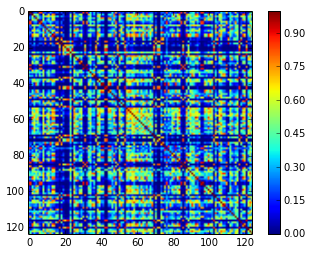

In [11]:
imshow(A); colorbar()

In [12]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics

af = AffinityPropagation().fit(A)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_


n_clusters_ = len(cluster_centers_indices)


print('Estimated number of clusters: %d' % n_clusters_)
print labels

Estimated number of clusters: 9
[0 0 7 2 4 7 0 0 3 1 6 3 1 7 7 1 1 8 1 8 8 8 8 3 8 3 6 5 4 3 0 8 0 4 3 5 5
 8 2 3 4 4 8 8 4 4 5 7 0 8 7 6 1 8 3 3 7 3 2 7 7 6 7 2 6 7 6 2 5 8 1 8 8 1
 1 4 0 4 5 3 7 4 7 7 0 8 0 7 7 3 5 5 7 7 5 0 0 4 4 7 4 3 8 6 1 7 2 5 5 0 1
 3 6 1 0 2 8 1 7 7 8 6 3 1]


In [13]:
pred = []
for i in range(n_clusters_):
    pred.append([])
for i in range(len(ps)):
    pred[labels[i]].append(ps[i])

print pred

[['Aemon', 'Alliser', 'Benjen', 'Bowen Marsh', 'Grenn', 'Halder', 'Jon Snow', 'Mormont', 'Pyp', 'Rast', 'Sam', 'Samwell Tarly', 'Thorne', 'Tyrion Lannister'], ['Bronn', 'Catelyn Stark', 'Chella', 'Chiggen', 'Conn', 'Kevan', 'Marillion', 'Moon', 'Mord', 'Shagga', 'Timett', 'Tyrion', 'Vardis', 'Yoren'], ['Arryn', 'Jaime', 'Lannister', 'Lord Tywin', 'Lysa Arryn', 'Starks', 'Tywin Lannister'], ['Brandon', 'Catelyn', 'Dragonstone', 'Eddard', 'Gregor Clegane', 'Highgarden', 'Jaime Lannister', 'King', 'King Robert', 'Kingslayer', 'Ned', 'Rhaegar Targaryen', 'Ser Gregor', 'Tommen', 'Winterfell'], ['Arya', 'Gregor', 'Harwin', 'Jeyne', 'Jeyne Poole', 'Joff', 'Joffrey', 'Mordane', 'Myrcella', 'Nymeria', 'Sandor Clegane', 'Sansa', 'Ser Boros'], ['Greatjon', 'Hodor', 'Hullen', 'Jon', 'Maester Luwin', 'Nan', 'Rickon', 'Robb', 'Roose Bolton', 'Theon', 'Theon Greyjoy'], ['Brynden', 'Edmure', 'Karstark', 'Lord Hoster', 'Lord Walder', 'Lysa', 'Ser Rodrik', 'Tully', 'Walder Frey'], ['Alyn', 'Baelish', 'C

In [14]:
f = open('./annotation_name','r')
truth = []
n = 0
for line in f:
    truth.append([])
    truth[n] = line.split('\n')[0].split(',')
    n = n + 1
    
print truth

f.close()

[['Aemon', 'Maester Aemon', 'Aemon Targaryen', 'Prince Aemon', 'Prince Aemon the Dragonknight'], ['Alliser', 'Alliser Thorne', 'Ser Alliser Thorne', 'Ser Alliser'], ['Alyn'], ['Arryn'], ['Arya', 'Arya Stark'], ['Baelish', 'Petyr Baelish', 'Petyr', 'Littlefinger', 'Lord Baelish', 'Lord Petyr'], ['Benjen', 'Benjen Stark'], ['Bowen Marsh'], ['Brandon', 'Brandon Stark'], ['Brandon', 'Brandon Stark', 'Bran'], ['Bronn'], ['Brynden', 'Blackfish', 'Ser Brynden', 'Ser Brynden Tully', 'Brynden Blackfish', 'Brynden Tully'], ['Catelyn', 'Catelyn Stark', 'Catelyn Tully Stark', 'Lady Catelyn Stark', 'Lady Catelyn', 'Catelyn Tully', 'Lady Stark'], ['Cersei', 'Cersei Lannister', 'Queen Cersei'], ['Chella'], ['Chiggen'], ['Cohollo'], ['Conn'], ['Daenerys', 'Dany', 'Daenerys Targaryen', 'Daenerys Stormborn', 'Princess Daenerys'], ['Doreah'], ['Dothraki'], ['Dragonstone'], ['Drogo', 'Khal Drogo', 'Khal'], ['Eddard', 'Ned', 'Eddard Stark', 'Ned Stark', 'Lord Eddard', 'Lord Eddard Stark', 'Lord Stark'], ['

to choose a most frequent number to represent this group

In [15]:
index_truth = []
for obj in pred:
    temp = []
    for element in obj:
        for i in range(len(truth)):
            if element in truth[i]:
                temp.append(i)
    index_truth.append(temp)
    
print index_truth

[[0, 1, 6, 7, 27, 29, 41, 62, 67, 69, 75, 75, 84, 88], [10, 12, 14, 15, 17, 45, 57, 59, 61, 81, 85, 88, 91, 96], [3, 35, 48, 52, 89, 55, 82, 52, 89], [8, 9, 12, 21, 23, 26, 31, 35, 46, 46, 35, 23, 71, 26, 86, 95], [4, 26, 30, 36, 36, 39, 39, 60, 63, 65, 76, 77, 79], [25, 32, 33, 40, 41, 56, 64, 72, 73, 74, 83, 83], [11, 24, 44, 50, 53, 55, 80, 87, 53], [2, 5, 13, 13, 40, 43, 47, 5, 49, 51, 54, 23, 5, 66, 70, 71, 46, 46, 78, 51, 92, 93], [16, 18, 18, 19, 20, 22, 28, 34, 37, 38, 42, 22, 34, 58, 58, 68, 42, 90, 94]]


treatment when two or more groups have a same number

if the list of representatives is for exemple [74,10,74,35,74,82,53,5,34]

there are 3 duplicated numbers 74 in position of 0,2 and 4

and given the counter of position 0: {74: 8, 15: 1, 13:1}

and of position 2: {74:6, 17:4}

I will take the second of position 2 instead of the second of position 0 because 8+4>6+1

in purpose of increasing the accuracy

when there are no more duplicated number, the vector 'pred' will be replaced by representatives for each group

In [16]:
frequency = [collections.Counter(x) for x in index_truth]
#print frequency
temp = [x.most_common(1)[0][0] for x in frequency]
#print temp

def findnext(current,i):
    return [x[0] for x in frequency[i].most_common(len(frequency[i].keys()))].index(current)+1

def notinlist(current,i):
    return current not in frequency[i].most_common(len(frequency[i].keys()))

while len(temp) != len(set(temp)):
    for i in range(len(temp)):
        for j in range(len(temp)):
            if i!=j and temp[i]==temp[j]:
                if findnext(temp[i],i) >= len(frequency[i].most_common(len(frequency[i].keys()))) and findnext(temp[j],j) >= len(frequency[j].most_common(len(frequency[j].keys()))):         #both 2 lists reach the end
                    loop = 0
                    while temp[i] in (temp[:i] + temp[(i + 1):]):
                        loop = loop + 1
                        if len(frequency) > len(truth) and loop > len(frequency):
                            temp[i] = randint(len(truth)+1, len(frequency)*2)
                        else:
                            temp[i] = randint(0,len(truth)+1)
                        
                elif notinlist(temp[i],i) or findnext(temp[i],i) >= len(frequency[i].most_common(len(frequency[i].keys()))):     #frequency[i] reaches its end
                    if temp[j] not in frequency[j].most_common(len(frequency[j].keys())):
                        loop = 0
                        while temp[j] in (temp[:j] + temp[(j + 1):]):
                            loop = loop + 1
                            if len(frequency) > len(truth) and loop > len(frequency):
                                temp[j] = randint(len(truth)+1, len(frequency)*2)
                            else:
                                temp[j] = randint(0,len(truth)+1)
                    else:
                        temp[j] = frequency[j].most_common(len(frequency[j].keys()))[findnext(temp[j],j)][0]
                    
                elif notinlist(temp[j],j) or findnext(temp[j],j) >= len(frequency[j].most_common(len(frequency[j].keys()))):
                    if temp[i] not in frequency[i].most_common(len(frequency[i].keys())):
                        loop = 0
                        while temp[i] in (temp[:i] + temp[(i + 1):]):
                            loop = loop + 1
                            if len(frequency) > len(truth) and loop > len(frequency):
                                temp[i] = randint(len(truth)+1, len(frequency)*2)
                            else:
                                temp[i] = randint(0,len(truth)+1)
                    else:
                        temp[i] = frequency[i].most_common(len(frequency[i].keys()))[findnext(temp[i],i)][0]
                    
                elif frequency[i].most_common(len(frequency[i].keys()))[findnext(temp[i],i)][1] + temp[j] <= frequency[j].most_common(len(frequency[j].keys()))[findnext(temp[j],j)][1] + temp[i]:
                    temp[j] = frequency[j].most_common(len(frequency[j].keys()))[findnext(temp[j],j)][0]
                    
                elif frequency[i].most_common(len(frequency[i].keys()))[findnext(temp[i],i)][1] + temp[j] > frequency[j].most_common(len(frequency[j].keys()))[findnext(temp[j],j)][1] + temp[i]:
                    temp[i] = frequency[i].most_common(len(frequency[i].keys()))[findnext(temp[i],i)][0]

index_pred = copy.deepcopy(index_truth)

for i in range(len(index_truth)):
    for j in range(len(index_truth[i])):
        index_pred[i][j] = temp[i]

print index_truth
print '\n\n\n'
print index_pred

[[0, 1, 6, 7, 27, 29, 41, 62, 67, 69, 75, 75, 84, 88], [10, 12, 14, 15, 17, 45, 57, 59, 61, 81, 85, 88, 91, 96], [3, 35, 48, 52, 89, 55, 82, 52, 89], [8, 9, 12, 21, 23, 26, 31, 35, 46, 46, 35, 23, 71, 26, 86, 95], [4, 26, 30, 36, 36, 39, 39, 60, 63, 65, 76, 77, 79], [25, 32, 33, 40, 41, 56, 64, 72, 73, 74, 83, 83], [11, 24, 44, 50, 53, 55, 80, 87, 53], [2, 5, 13, 13, 40, 43, 47, 5, 49, 51, 54, 23, 5, 66, 70, 71, 46, 46, 78, 51, 92, 93], [16, 18, 18, 19, 20, 22, 28, 34, 37, 38, 42, 22, 34, 58, 58, 68, 42, 90, 94]]




[[75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75], [96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96], [52, 52, 52, 52, 52, 52, 52, 52, 52], [35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35], [36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36], [83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83], [53, 53, 53, 53, 53, 53, 53, 53, 53], [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5], [34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 3

Adjusted Rand index

In [17]:
labels_true = []
labels_pred = []
for i in range(len(index_truth)):
    labels_true = labels_true + index_truth[i]
    labels_pred = labels_pred + index_pred[i]
    
metrics.adjusted_rand_score(labels_true, labels_pred)

0.037284312058619845

Mutual Information based scores

In [18]:
metrics.adjusted_mutual_info_score(labels_true, labels_pred)

0.070093312914589076